## **Central Limit Theorem**

The Central Limit Theorem states that, regardless of the probability distribution from which the data is sampled, the sample mean of the sampled values approaches a normal distribution as the number of sampled values inc reases.  

---


#### **Python Implementation**

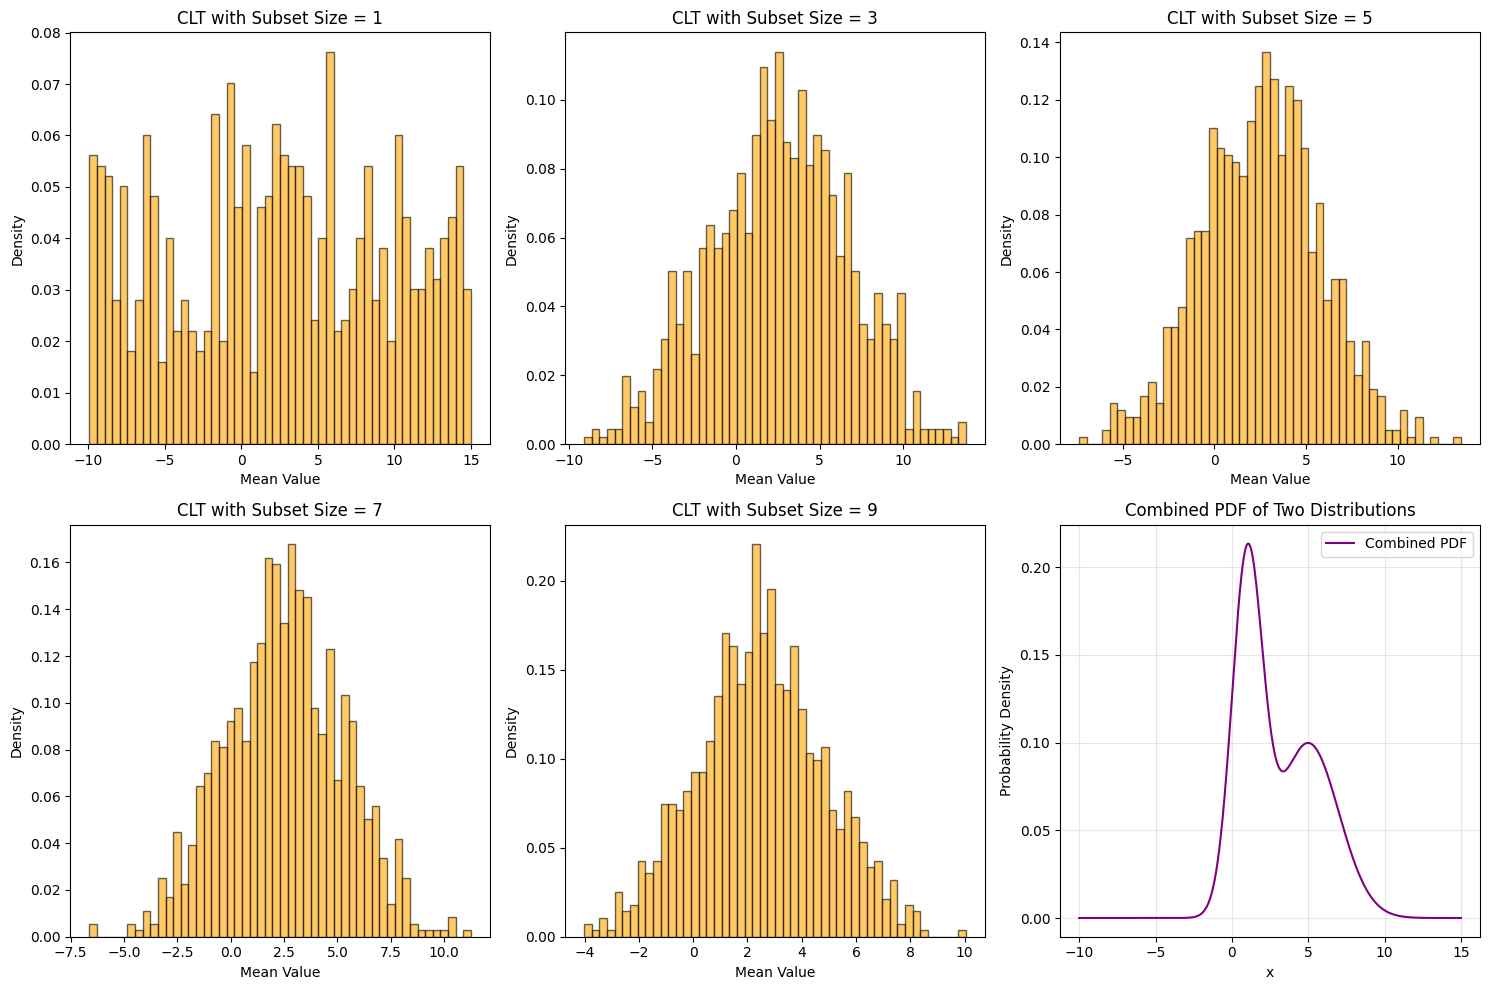

In [32]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define the two normal distributions
# norm(loc, scale) creates a normal distribution with specified mean (loc) and standard deviation (scale)
norm_dist_1 = norm(loc=1, scale=1)  # First normal distribution: N(1, 1)
norm_dist_2 = norm(loc=5, scale=2)  # Second normal distribution: N(5, 4)

# Step 2: Set the weights for the mixture model
# The weights must sum to 1 (pi_1 + pi_2 = 1)
pi_1 = 0.5  # Weight for the first distribution
pi_2 = 1 - pi_1  # Weight for the second distribution

# Step 3: Create a range of x values for the PDF calculation
# This range determines the x-axis of the graph
x = np.linspace(-10, 15, 1000)  # 1000 points between -10 and 15

# Step 4: Calculate the PDFs for the two distributions
pdf_1 = norm_dist_1.pdf(x) * pi_1  # Weighted PDF for the first distribution
pdf_2 = norm_dist_2.pdf(x) * pi_2  # Weighted PDF for the second distribution
combined_pdf = pdf_1 + pdf_2       # Combined PDF for the mixture distribution




# Step 5: Simulate the Central Limit Theorem (CLT)
num_samples = 1000  # Number of samples to draw
sampled_data = np.random.choice(x, size=num_samples)  # Sample based on combined PDF

# Take means of subsets of the sampled data
subset_sizes = [1, 3, 5, 7, 9]  # Different subset sizes
plt.figure(figsize=(15, 10))

for i, subset_size in enumerate(subset_sizes, start=1):
    num_subsets = 1000  # Number of subsets
    subset_means = [
        np.mean(np.random.choice(sampled_data, size=subset_size)) for _ in range(num_subsets)
    ]  # Calculate the mean of each subset

    # Plot the sample means distribution
    plt.subplot(2, 3, i)
    plt.hist(subset_means, bins=50, density=True, alpha=0.6, color='orange', edgecolor='black')
    plt.title(f'CLT with Subset Size = {subset_size}')
    plt.xlabel('Mean Value')
    plt.ylabel('Density')

# Plot the combined PDF for reference
plt.subplot(2, 3, len(subset_sizes) + 1)
plt.plot(x, combined_pdf, label='Combined PDF', color='purple')
plt.title('Combined PDF of Two Distributions')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


#### **Conclution**

As the size of the subsets increases, the distribution of sample mean becomes closer to a normal distribution.